In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('data_scaled.csv')

In [3]:
data

,SP,RP,SRP,LRP,FHP,BHP,RANK,RANKDIFF,SA,SRA,FHA,BALANCE,WON
0,0.600,0.400,0.244,0.756,0.511,0.489,1,-0.062078,0.200,-0.512,0.022,0.353155,1.0
1,0.666,0.334,0.194,0.806,0.171,0.829,12,0.062078,0.332,-0.612,-0.658,0.879854,-1.0
2,0.522,0.478,0.295,0.705,0.720,0.280,3,-0.039504,0.044,-0.410,0.440,0.450243,1.0
3,0.558,0.442,0.205,0.795,0.617,0.383,10,0.039504,0.116,-0.590,0.234,0.478155,-1.0
4,0.561,0.439,0.157,0.843,0.578,0.422,3,0.011287,0.122,-0.686,0.156,0.492718,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.552,0.448,0.421,0.579,0.702,0.298,368,2.020364,0.104,-0.158,0.404,0.311893,-1.0
354,0.555,0.445,0.361,0.639,0.638,0.362,28,-0.152374,0.110,-0.278,0.276,0.310680,-1.0
355,0.525,0.475,0.275,0.725,0.615,0.385,55,0.152374,0.050,-0.450,0.230,0.350728,1.0
356,0.512,0.488,0.179,0.821,0.666,0.334,10,-0.744939,0.024,-0.642,0.332,0.513350,1.0


In [4]:
columns = ['SP', 'RP', 'SRP', 'LRP', 'FHP', 'BHP', 'RANKDIFF', 'SA', 'SRA', 'FHA', 'BALANCE']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data[columns], data.WON, train_size=0.9)

In [13]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
model1.predict(X_test)
model1.score(X_test, y_test)

0.7222222222222222

In [11]:
model1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [19]:
model2 = LogisticRegression(C=0.1, solver='newton-cg')
model2.fit(X_train, y_train)
model2.predict(X_test)
model2.score(X_test, y_test)

0.6666666666666666

In [44]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
c_values = np.linspace(0.5,0.8,10)

In [45]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(data[columns], data.WON)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.696402 using {'C': 0.6, 'penalty': 'l2', 'solver': 'newton-cg'}
0.693598 (0.070168) with: {'C': 0.5, 'penalty': 'l2', 'solver': 'newton-cg'}
0.693598 (0.070168) with: {'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}
0.691746 (0.072289) with: {'C': 0.5, 'penalty': 'l2', 'solver': 'liblinear'}
0.694550 (0.070635) with: {'C': 0.5333333333333333, 'penalty': 'l2', 'solver': 'newton-cg'}
0.694550 (0.070635) with: {'C': 0.5333333333333333, 'penalty': 'l2', 'solver': 'lbfgs'}
0.693624 (0.072605) with: {'C': 0.5333333333333333, 'penalty': 'l2', 'solver': 'liblinear'}
0.696402 (0.074161) with: {'C': 0.5666666666666667, 'penalty': 'l2', 'solver': 'newton-cg'}
0.696402 (0.074161) with: {'C': 0.5666666666666667, 'penalty': 'l2', 'solver': 'lbfgs'}
0.695476 (0.071891) with: {'C': 0.5666666666666667, 'penalty': 'l2', 'solver': 'liblinear'}
0.696402 (0.073113) with: {'C': 0.6, 'penalty': 'l2', 'solver': 'newton-cg'}
0.696402 (0.073113) with: {'C': 0.6, 'penalty': 'l2', 'solver': 'lbfgs'}
0.69359

In [42]:
solvers = ['saga', 'liblinear']
penalty = ['l1']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [43]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(data[columns], data.WON)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.687222 using {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.682275 (0.082664) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.682275 (0.082664) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.685952 (0.088071) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.685979 (0.085865) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.684365 (0.063005) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.684365 (0.071167) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.675979 (0.075528) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.687222 (0.075818) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.500952 (0.006317) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
0.500000 (0.006389) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [46]:
grid_result.best_estimator_

LogisticRegression(C=0.6, solver='newton-cg')

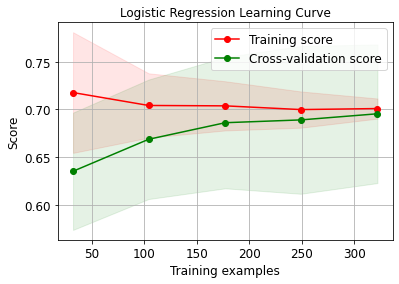

In [50]:
skplt.estimators.plot_learning_curve(grid_result.best_estimator_, data[columns], data.WON,
                                     cv=cv, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Logistic Regression Learning Curve");
plt.savefig('Logistic Regression LC F', dpi=300)